In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas
import matplotlib
import requests
from configNW import apiKey
import matplotlib.colors as colors
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
#%matplotlib

## Characteristics of Business Table

### Get main table

In [2]:
# get data from characteristics of business table from API using requests method
def get_request(url, parameters = {}):
    return requests.get(url, params = parameters)
url = "https://api.census.gov/data/2018/abscb"
params = {
            "get": "BUSCHAR,BUSCHAR_LABEL,QDESC,QDESC_LABEL,STATE,NAME,EMP,EMP_PCT,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,RCPPDEMP,PAYANN,PAYANN_PCT",
            "for": "us",
            "key": apiKey
        }
res = get_request(url, params).json()
abscb = pd.DataFrame(res[1:], columns = res[0])
abscb["EMP"] = abscb["EMP"].astype("int64")
abscb["PAYANN"] = abscb["PAYANN"].astype("int64")
abscb["PAYANN_PCT"] = abscb["PAYANN_PCT"].astype(float)
abscb["EMP_PCT"] = abscb["EMP_PCT"].astype(float)
# avg annual pay by race in the united states
abscb["Mean Annual Pay Per Employee"] = round((abscb["PAYANN"]/abscb["EMP"])*1000, 0)
#abscb["STATE"] = abscb["STATE"].astype(int)
abscb.head()

,BUSCHAR,BUSCHAR_LABEL,QDESC,QDESC_LABEL,STATE,NAME,EMP,EMP_PCT,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,RCPPDEMP,PAYANN,PAYANN_PCT,us,Mean Annual Pay Per Employee
0,A1,All firms,B01,OWNRNUM,None,United States,128196406,0.0,001,Total,00,Total,001,Total,38405539368,6937240308,0.0,1,54114.0
1,BQ,1 person,B01,OWNRNUM,None,United States,10991334,20.1,001,Total,00,Total,001,Total,2270021185,454218390,14.2,1,41325.0
2,BQ01,2 to 4 people,B01,OWNRNUM,None,United States,11240900,20.6,001,Total,00,Total,001,Total,2462681905,478308387,15.0,1,42551.0
3,BQ02,5 to 10 people,B01,OWNRNUM,None,United States,1423837,2.6,001,Total,00,Total,001,Total,413777541,75150602,2.4,1,52780.0
4,BQ03,11 or more people,B01,OWNRNUM,None,United States,13448854,24.6,001,Total,00,Total,001,Total,6023549720,986906070,30.9,1,73382.0


### Mean annual payroll by employee and race chart

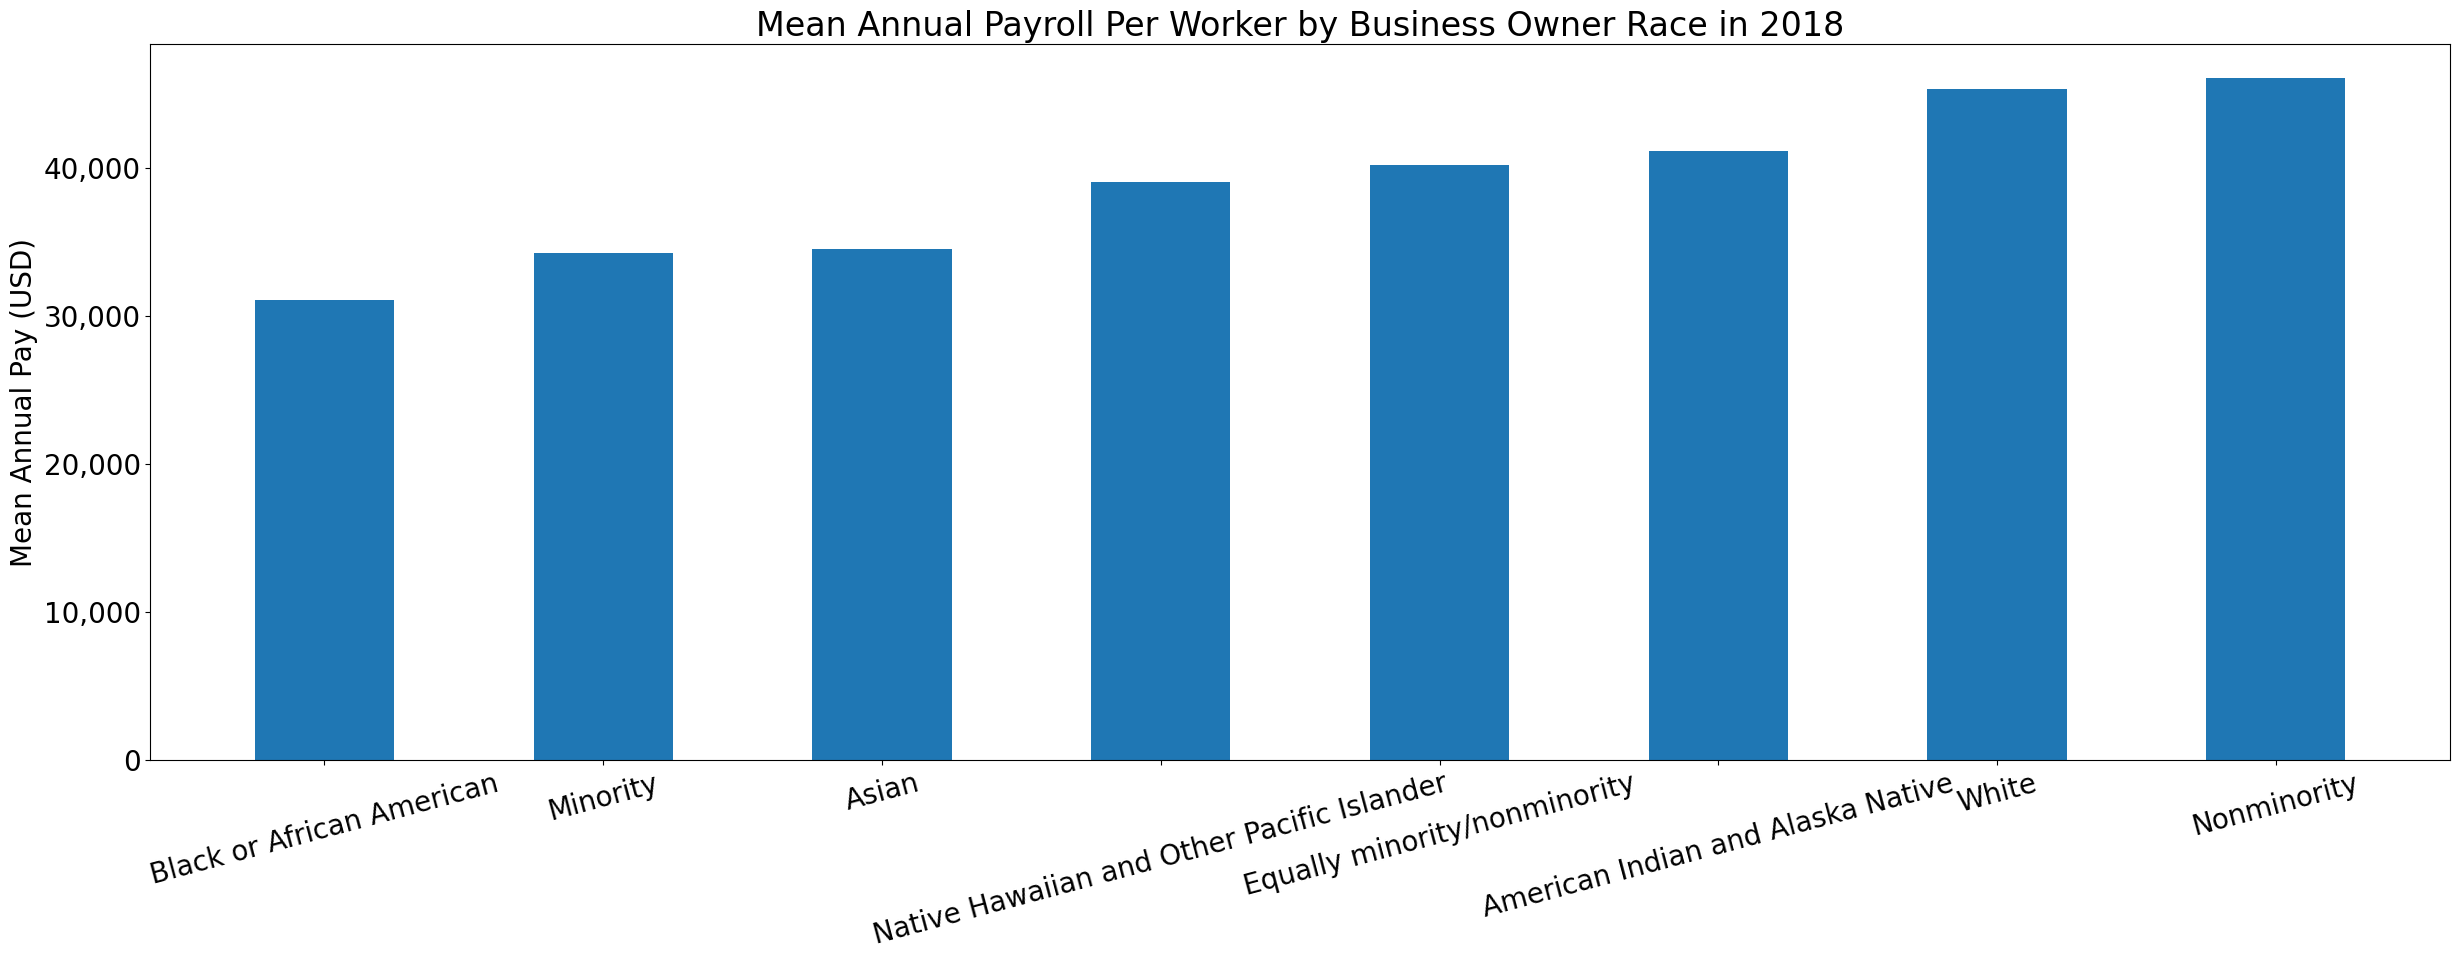

In [4]:
# chart showing mean employee annual pay per employee by race group

abscb_mean_pay_us_race = abscb[(abscb["BUSCHAR_LABEL"] == "All firms") & (abscb["QDESC_LABEL"] == "WORKERS") & (abscb["RACE_GROUP_LABEL"] != "Total") & 
                                (abscb["SEX_LABEL"] == "Total")].sort_values(by = "Mean Annual Pay Per Employee")
# set font for figure
plt.rcParams.update({'font.size': 20})                   
#abscb_mean_pay_us_race.sort_values(by = "Mean Annual Pay Per Employee", inplace=True)
# plot 
plt.figure(figsize=(25,10))
plt.bar(abscb_mean_pay_us_race["RACE_GROUP_LABEL"], abscb_mean_pay_us_race["Mean Annual Pay Per Employee"], width = 0.5, color = "#1f77b4") #
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(15)

ax = plt.gca()
#ax.set_xlabel('Date')
ax.set_ylabel('Mean Annual Pay (USD)')
ax.set_title('Mean Annual Payroll Per Worker by Business Owner Race in 2018')

# set size of axis text
#ax.tick_params(axis = 'x', labelsize = 20)
#ax.tick_params(axis = 'y', labelsize = 20)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
plt.tight_layout()
#plt.savefig('abscb_mean_payroll_us_race.png', facecolor='white', transparent=False)


In [ ]:
abscb_mean_pay_us_race

### % employment type by business owner race chart

In [5]:
# chart for average payroll per worker by race and type of work

worker_valid_bushchar = ["A1","JT","JU","JW","JX","JY","KA"]
abscb_employment_type_race = abscb[(abscb["RACE_GROUP_LABEL"] != "Total") & (abscb["BUSCHAR"].isin(worker_valid_bushchar)) &
                                (~abscb["Mean Annual Pay Per Employee"].isna()) &(abscb["QDESC_LABEL"] == "WORKERS") & (abscb["SEX_LABEL"] == "Total")]
# filter to get columns we need
abscb_employment_type_race_filtered = abscb_employment_type_race[["BUSCHAR_LABEL", "RACE_GROUP_LABEL", "EMP_PCT"]][~abscb_employment_type_race["BUSCHAR_LABEL"].isin(["All firms", "Item not reported"])]
# pivot to move race to columns
abscb_employment_type_race_chart = abscb_employment_type_race_filtered.pivot_table(values='EMP_PCT', index='RACE_GROUP_LABEL', columns='BUSCHAR_LABEL', aggfunc=[np.sum])
#abscb_worker_pay_pct_by_type_chart.drop(["Total reporting", "None of the above"], axis = 1, inplace=True)
abscb_employment_type_race_chart

sum  \
BUSCHAR_LABEL                              Contractors, subcontractors, independent contractors, or outside consultants   
RACE_GROUP_LABEL                                                                                                          
American Indian and Alaska Native                                                        43.2                             
Asian                                                                                    27.7                             
Black or African American                                                                45.4                             
Equally minority/nonminority                                                             38.3                             
Minority                                                                                 34.2                             
Native Hawaiian and Other Pacific Islander                                               54.7                             
Nonminority                                                                              41.2                             
White                                                                                    41.2                             

                                                                     \
BUSCHAR_LABEL                              Full-time paid employees   
RACE_GROUP_LABEL                                                      
American Indian and Alaska Native                              90.7   
Asian                                                          85.7   
Black or African American                                      89.7   
Equally minority/nonminority                                   88.9   
Minority                                                       88.4   
Native Hawaiian and Other Pacific Islander                     94.2   
Nonminority                                                    92.9   
White                                                          92.8   

                                                                                                                        \
BUSCHAR_LABEL                              Leased employees from leasing service or professional employer organization   
RACE_GROUP_LABEL                                                                                                         
American Indian and Alaska Native                                                         4.9                            
Asian                                                                                     0.8                            
Black or African American                                                                 1.6                            
Equally minority/nonminority                                                              NaN                            
Minority                                                                                  1.3                            
Native Hawaiian and Other Pacific Islander                                                NaN                            
Nonminority                                                                               1.9                            
White                                                                                     1.9                            

                                                                     \
BUSCHAR_LABEL                              Part-time paid employees   
RACE_GROUP_LABEL                                                      
American Indian and Alaska Native                              68.2   
Asian                                                          78.5   
Black or African American                                      73.2   
Equally minority/nonminority                                   77.2   
Minority                                                       74.9   
Native Hawaiian and Other Pacific Islander                     71.9  

[43.2 27.7 45.4 38.3 34.2 54.7 41.2 41.2]
[90.7 85.7 89.7 88.9 88.4 94.2 92.9 92.8]
[4.9 0.8 1.6 0.  1.3 0.  1.9 1.9]
[68.2 78.5 73.2 77.2 74.9 71.9 74.2 73.9]
[ 0.   5.9  5.7  0.   6.5  6.  12.8 12.4]


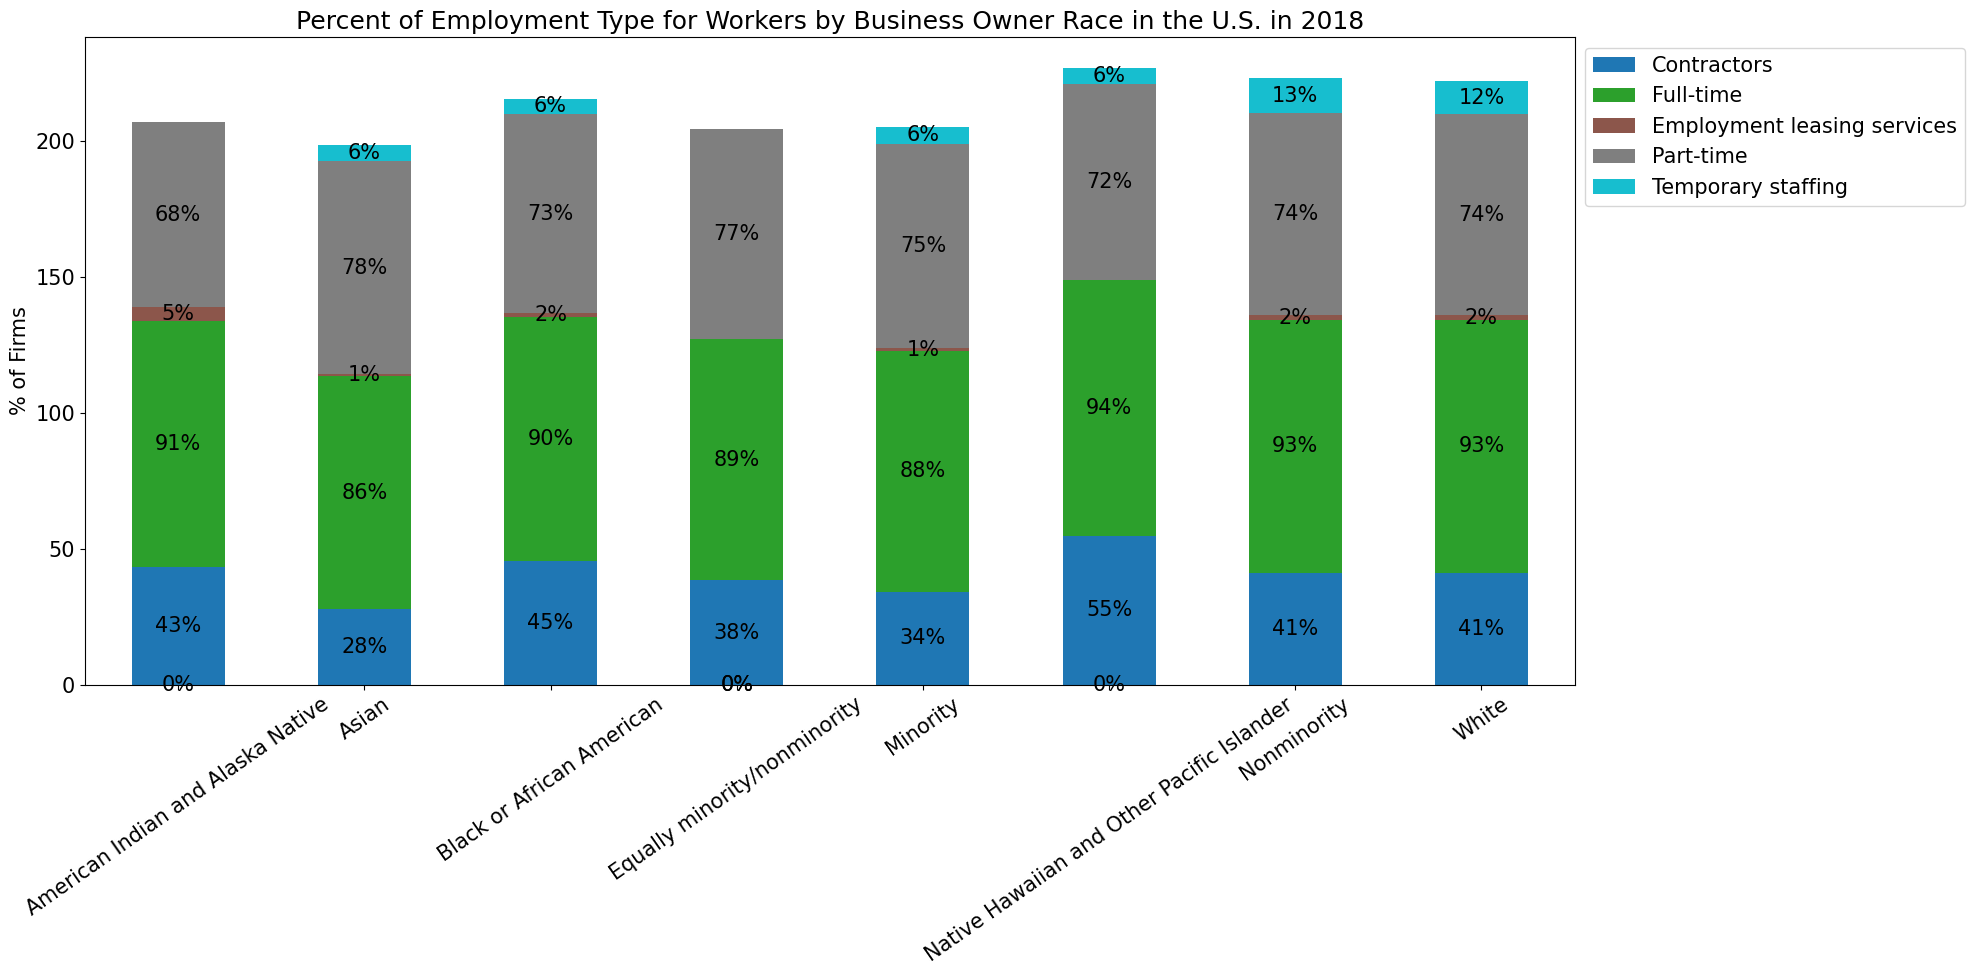

In [10]:
#set font size
plt.rcParams.update({'font.size': 15}) 

ax = abscb_employment_type_race_chart.plot.bar(stacked=True, rot=0, cmap='tab10', figsize=(20, 10))
#ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left')

#rotate the tick labels for the x axis
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(35)

# add legend
ax.legend(["Contractors", "Full-time", "Employment leasing services", "Part-time", "Temporary staffing"], bbox_to_anchor=(1, 1))

#ax.set_xlabel('Date')
ax.set_ylabel('% of Firms')
ax.set_title('Percent of Employment Type for Workers by Business Owner Race in the U.S. in 2018')
ax.set_xlabel(None)

for container in ax.containers:
    ax.bar_label(container, label_type="center",fmt='%.0f%%')
    print(container.datavalues)
plt.tight_layout()
# plt.show()

#plt.savefig('abscb_employment_type_race_pct_us.png', facecolor='white', transparent=False)

### Mean worker annual payroll by business owner sex chart

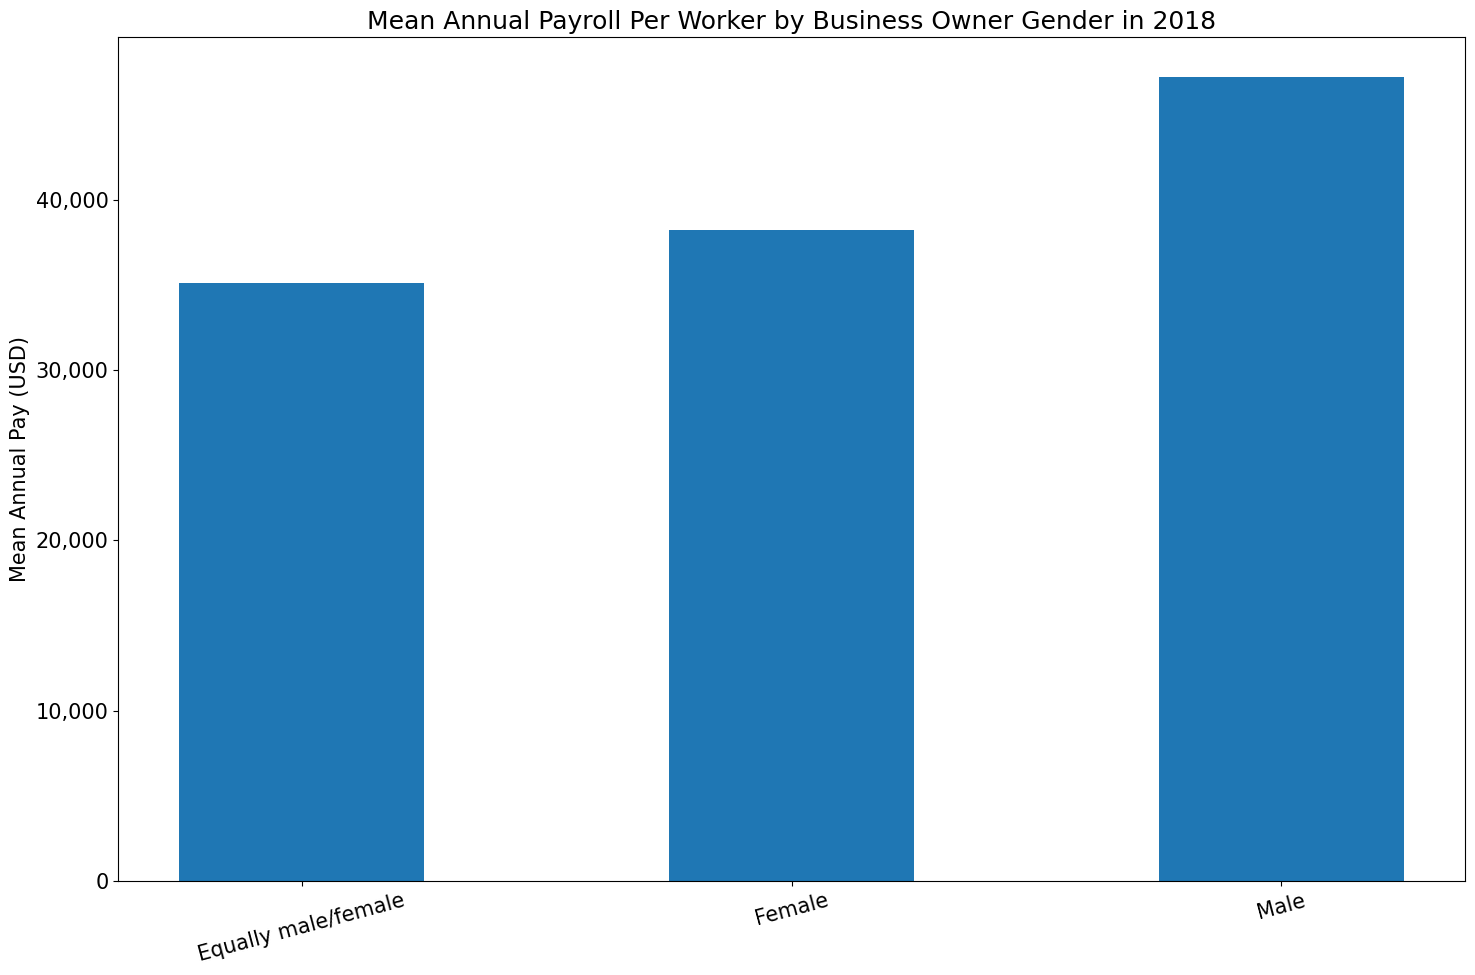

In [7]:
# chart showing mean employee annual pay per employee by owner sex 
# set font for figure
plt.rcParams.update({'font.size': 15}) 

abscb_mean_pay_us_sex = abscb[(abscb["BUSCHAR_LABEL"] == "All firms") & (abscb["QDESC_LABEL"] == "WORKERS") & (abscb["RACE_GROUP_LABEL"] == "Total") & (abscb["ETH_GROUP_LABEL"] == "Total") &
                                (abscb["SEX_LABEL"] != "Total")].sort_values(by = "Mean Annual Pay Per Employee")
                               
#abscb_mean_pay_us_race.sort_values(by = "Mean Annual Pay Per Employee", inplace=True)
# plot 
plt.figure(figsize=(15,10))
plt.bar(abscb_mean_pay_us_sex["SEX_LABEL"], abscb_mean_pay_us_sex["Mean Annual Pay Per Employee"], width = 0.5, color = "#1f77b4") #
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(15)

ax = plt.gca()
#ax.set_xlabel('Date')
ax.set_ylabel('Mean Annual Pay (USD)')
ax.set_title('Mean Annual Payroll Per Worker by Business Owner Gender in 2018')

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
#plt.savefig('abscb_mean_payroll_us_sex.png', facecolor='white', transparent=False)

In [ ]:
abscb_mean_pay_us_sex

### % employment type by business owner sex chart

In [8]:
# chart for average payroll per worker by race and type of work

worker_valid_bushchar = ["A1","JT","JU","JW","JX","JY","KA"]
abscb_employment_type_sex = abscb[(abscb["RACE_GROUP_LABEL"] == "Total") & (abscb["BUSCHAR"].isin(worker_valid_bushchar)) & (abscb["ETH_GROUP_LABEL"] == "Total") &
                                (~abscb["Mean Annual Pay Per Employee"].isna()) &(abscb["QDESC_LABEL"] == "WORKERS") & (abscb["SEX_LABEL"] != "Total")]
# filter to get columns we need
abscb_employment_type_sex_filtered = abscb_employment_type_sex[["BUSCHAR_LABEL", "SEX_LABEL", "EMP_PCT"]][~abscb_employment_type_sex["BUSCHAR_LABEL"].isin(["All firms", "Item not reported"])]
# pivot to move race to columns
abscb_employment_type_sex_chart = abscb_employment_type_sex_filtered.pivot_table(values='EMP_PCT', index='SEX_LABEL', columns='BUSCHAR_LABEL', aggfunc=[np.sum])
#abscb_worker_pay_pct_by_type_chart.drop(["Total reporting", "None of the above"], axis = 1, inplace=True)
abscb_employment_type_sex_chart

sum  \
BUSCHAR_LABEL       Contractors, subcontractors, independent contractors, or outside consultants   
SEX_LABEL                                                                                          
Equally male/female                                               34.9                             
Female                                                            38.3                             
Male                                                              41.6                             

                                              \
BUSCHAR_LABEL       Full-time paid employees   
SEX_LABEL                                      
Equally male/female                     90.4   
Female                                  88.1   
Male                                    93.4   

                                                                                                 \
BUSCHAR_LABEL       Leased employees from leasing service or professional employer organization   
SEX_LABEL                                                                                         
Equally male/female                                                1.1                            
Female                                                             1.2                            
Male                                                               2.2                            

                                              \
BUSCHAR_LABEL       Part-time paid employees   
SEX_LABEL                                      
Equally male/female                     76.9   
Female                                  77.4   
Male                                    73.1   

                                                                               
BUSCHAR_LABEL       Temporary staffing obtained from a temporary help service  
SEX_LABEL                                                                      
Equally male/female                                                8.3         
Female                                                             9.0         
Male                                                              13.1

[34.9 38.3 41.6]
[90.4 88.1 93.4]
[1.1 1.2 2.2]
[76.9 77.4 73.1]
[ 8.3  9.  13.1]


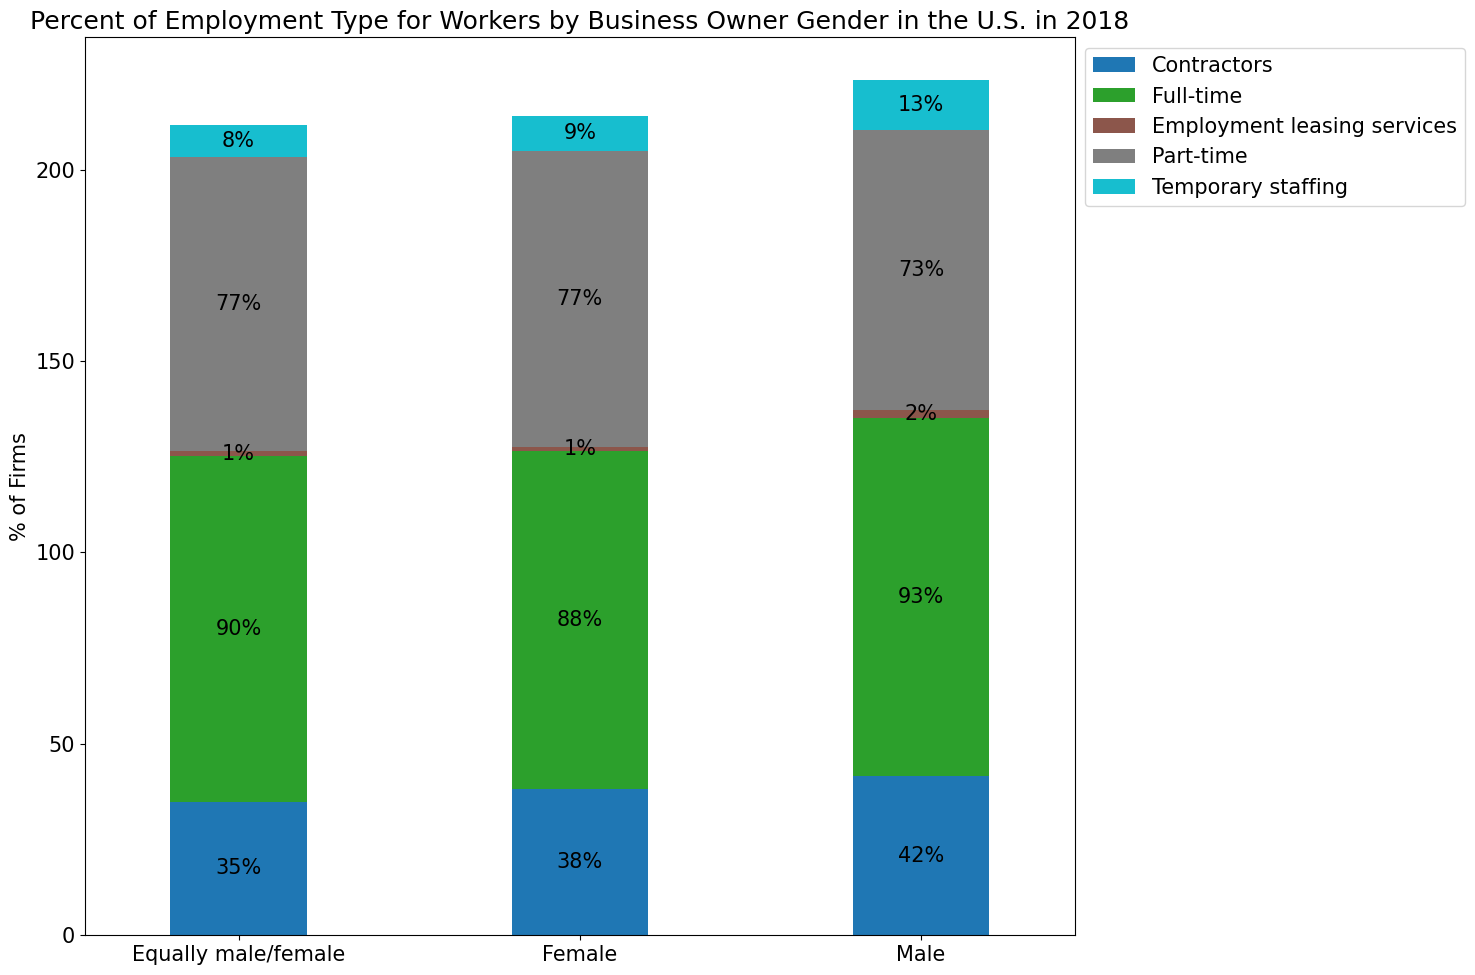

In [11]:
ax = abscb_employment_type_sex_chart.plot.bar(stacked=True, rot=0, cmap='tab10', figsize=(15, 10), width = 0.4)
#ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left')
# set font for figure
plt.rcParams.update({'font.size': 15}) 

#rotate the tick labels for the x axis
# x = plt.gca().xaxis
# for item in x.get_ticklabels():
#     item.set_rotation(15)

# add legend
ax.legend(["Contractors", "Full-time", "Employment leasing services", "Part-time", "Temporary staffing"], loc = "upper left", bbox_to_anchor=(1, 1))

#ax.set_xlabel('Date')
ax.set_ylabel('% of Firms')
ax.set_title('Percent of Employment Type for Workers by Business Owner Gender in the U.S. in 2018')
ax.set_xlabel(None)

for container in ax.containers:
    ax.bar_label(container, label_type="center",fmt='%.0f%%')
    print(container.datavalues)

plt.tight_layout()
# plt.show()

#plt.savefig('abscb_employment_type_sex_pct_us.png', facecolor='white', transparent=False)

### Company Summary Table

In [ ]:
# get data from company summary table from API using requests method
def get_request(url, parameters = {}):
    return requests.get(url, params = parameters)
url = "https://api.census.gov/data/2018/abscs"
params = {
            "get": "STATE,NAME,EMP,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,RCPPDEMP",
            "for": "state",
            "key": apiKey
        }
res = get_request(url, params).json()
abscs = pd.DataFrame(res[1:], columns = res[0])
abscs["STATE"] = abscs["STATE"].astype(int)
abscs["EMP"] = abscs["EMP"].astype(int)
abscs.head()

In [ ]:
# create race chart
race_chart = abscs[["EMP", "RACE_GROUP_LABEL"]].groupby("RACE_GROUP_LABEL").sum()
#race_chart["EMP"] = race_chart["EMP"].astype(float)
race_chart.sort_values(by = "EMP", inplace=True)
race_chart


In [ ]:
# drop total from index
race_chart.drop("Total", inplace=True)

In [ ]:
# plot 
plt.figure(figsize=(15,10))
plt.bar(race_chart.index, race_chart["EMP"], width = 0.3)
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(70)

ax = plt.gca()
#ax.set_xlabel('Date')
ax.set_ylabel('# Employees')
ax.set_title('Business Owners in U.S. - Number of Employees by Race in 2018')

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.savefig('businessOwnnerRace.png', facecolor='white', transparent=False)

In [ ]:
# create ethnicity chart
eth_chart = abscs[["EMP", "ETH_GROUP_LABEL"]].groupby("ETH_GROUP_LABEL").sum()
eth_chart.sort_values(by = "EMP", inplace=True)
eth_chart

In [ ]:
# drop total from index
eth_chart.drop("Total", inplace=True)

In [ ]:
# plot ethnicity chart
plt.figure(figsize=(15,10))
plt.bar(eth_chart.index, eth_chart["EMP"], width = 0.3)
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(70)

ax = plt.gca()
#ax.set_xlabel('Date')
ax.set_ylabel('# Employees')
ax.set_title('Busiuness Owners in U.S. - Number of Employees by Ethnicity in 2018')

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.savefig('businessOwnerEth.png', facecolor='white', transparent=False)

In [ ]:
# create top 10 employees aggregated by state
state = abscs[["EMP", "NAME"]].groupby("NAME").sum()
state.sort_values(by = "EMP", inplace=True)
state.head()

In [ ]:
# plot employees by state chart
plt.figure(figsize=(25,10))
plt.bar(state.index, state["EMP"], width = 0.3)
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(70)

ax = plt.gca()
#ax.set_xlabel('Date')
ax.set_ylabel('# Employees')
ax.set_title('Busiuness Owners in U.S. - Number of Employees by State in 2018')

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig('businessByState.png', facecolor='white', transparent=False)

### Create merged table

### Notes and random stuff

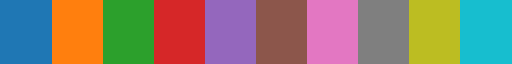

In [24]:
import matplotlib.colors as colors
# get color map visual colors
plt.get_cmap("tab10")
##################################

In [35]:
# print out specific color from color map in rgb format to put in chart that takes only one color input
rgba = plt.cm.get_cmap(str("tab10"))(4)
clr = colors.rgb2hex(rgba)
clr

'#9467bd'

In [ ]:
# get data from characteristics of business table from API using requests method
# Payann chart
def get_request(url, parameters = {}):
    return requests.get(url, params = parameters)
url = "https://api.census.gov/data/2018/abscb"
params = {
            "get": "QDESC,QDESC_LABEL,STATE,NAME,PAYANN,SEX,SEX_LABEL,RACE_GROUP,RACE_GROUP_LABEL",
            "for": "state",
            "key": apiKey
        }
res = get_request(url, params).json()
abscb = pd.DataFrame(res[1:], columns = res[0])
abscb["STATE"] = abscb["STATE"].astype(int)
abscb["PAYANN"] = abscb["PAYANN"].astype(float)
abscb.sort_values(by = "PAYANN", inplace=True)
abscb.head()

In [ ]:
abscb[""].unique()

In [ ]:
# # get data from API using cenpy
# shortCodes = cenpy.explorer.available()
# shortCodes.loc["ABSCS2019"]

# # query 2019 Anual Business Survey census tables 
# conn = cenpy.remote.APIConnection("ABSCS2019")

# # view variables
# # searching as "ABSCS2019"
# variables = conn.variables
# #variables.head()

# # query the 2020 5-year ACS for median income and margin of error, using zip code as the aggregation geography
# names = ["STATE", "EMP", "ETH_GROUP", "RACE_GROUP", "RCPPDEMP"]
# business = conn.query(names, geo_unit='state')
# # income.rename(columns={'B19013_001E': 'income', 'B19013_001M': 'margin of error'}, inplace=True)
# # income['income'] = income['income'].astype(float)
# # income['margin of error'] = income['margin of error'].astype(float)
# # change data type of state column to int
# business["STATE"] = business["STATE"].astype(int)

In [ ]:
# # load states FIPS for merge
# states = pd.read_csv("stateFIPS.txt", sep = "|")
# states.info()

In [ ]:
# # merge state FIPS to business dataframe
# busState = abscs.merge(states[["STATE_NAME", "STATE"]], left_on = "STATE", right_on = "STATE")
# busState.head()

In [ ]:
# # use dictionaries to map codes to names, codes on: https://www2.census.gov/programs-surveys/abs/technical-documentation/api/ABS_API_CB-10-4-2021.pdf
# eth_group = {"001": "Total", "020": "Hispanic", "028": "Equally Hispanic/non-Hispanic", "029": "Non-Hispanic", "096": "Classifiable", "098": "Unclassifiable"}
# race_group = {"00": "Total", "30": "White", "40": "Black or African American", "50": "American Indian and Alaska Native", "60": "Asian", "70": "Native Hawaiian and Other Pacific Islander",
#                 "90": "Minority", "91": "Equally minority/non-minority", "92": "Non-minority", "96": "Classifiable", "98": "Unclassifiable"}
# busState["ETH_GROUP_NAME"] = busState["ETH_GROUP"].apply(lambda x: eth_group[x])
# busState["RACE_GROUP_NAME"] = busState["RACE_GROUP"].apply(lambda x: race_group[x])
# busState["EMP"] = busState["EMP"].astype(int)
# busState.head(10)